# Vehicle loan Prediction Machine Learning Model
Importing libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sci

Loading the data as dataframe

In [16]:
loan_df = pd.read_csv("C:\\Users\\hp\\Desktop\\BIDA notes\\loan default machine learning\\data\\vehicle_loans.csv", index_col="UNIQUEID")

Getting the first 5 rows of the data

In [19]:
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


Numnber of rows and columns in the data

In [20]:
loan_df.shape

(233154, 40)

In [21]:
print("Number of rows: ", loan_df.shape[0])
print("Number of columns: ", loan_df.shape[1])

Number of rows:  233154
Number of columns:  40


Ok, so we have 233154 data points each with 40 variables


Data types in the columns and the number of not nulls in the columns

In [23]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

we have 3 data types:

int64 (whole number)
float64 (floating point number)
object (string or non-numeric)

DATE_OF_BIRTH, EMPLOYMENT_TYPE, DISBURSAL_DATE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH are all object data types, meaning they contain non-numeric values such as strings or dates.

EMPLOYMENT_TYPE has some missing values

convert disbursal date to datetime so as to get the date range of the data.

In [28]:
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

In [29]:
print("Maximum Disbursal Date: ", loan_df['DISBURSAL_DATE'].max())
print("Minium Disbursal Date: ", loan_df['DISBURSAL_DATE'].min())

Maximum Disbursal Date:  2018-12-10 00:00:00
Minium Disbursal Date:  2018-01-08 00:00:00


In [30]:
print("Timespan of Data Set: ", loan_df['DISBURSAL_DATE'].max() - loan_df['DISBURSAL_DATE'].min())

Timespan of Data Set:  336 days 00:00:00


Our dataset has information for 233154 loans
There are 40 variables
The data covers loans over 336 days between January and December 2018


Explore the Target Variable - LOAN_DEFAULT
How many people defaulted on their loans?


In [32]:
loan_df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [33]:
loan_df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

The rate of defaulted loans is about 21.7% 

Visualize the Target Variable


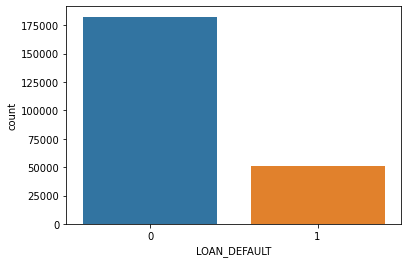

In [34]:
sns.countplot(x="LOAN_DEFAULT", data=loan_df)
plt.show()

Identifying Missing Data in the EMPLOYMENT_TYPE column Time to investigate what we saw earlier by identifying the columns with missing values

In [35]:
loan_df.isnull()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537409,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
417566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
624493,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
606141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
613658,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
loan_df.isnull().any()

DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                    False
BRANCH_ID                              False
SUPPLIER_ID                            False
MANUFACTURER_ID                        False
CURRENT_PINCODE_ID                     False
DATE_OF_BIRTH                          False
EMPLOYMENT_TYPE                         True
DISBURSAL_DATE                         False
STATE_ID                               False
EMPLOYEE_CODE_ID                       False
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                            False
PAN_FLAG                               False
VOTERID_FLAG                           False
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                      False
PERFORM_CNS_SCORE_DESCRIPTION          False
PRI_NO_OF_ACCTS                        False
PRI_ACTIVE_ACCTS                       False
PRI_OVERDU

In [37]:
loan_df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64


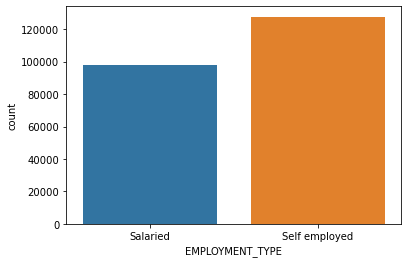

In [38]:
print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

Populating missing values with a placeholder 'Missing' using pandas fillna

In [39]:
loan_df = loan_df.fillna(value={'EMPLOYMENT_TYPE' : 'Missing'})

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64


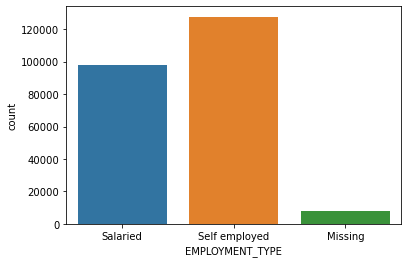

In [40]:
print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

In [41]:
loan_df[['DISBURSAL_DATE', 'DATE_OF_BIRTH']].sample(10)

,DISBURSAL_DATE,DATE_OF_BIRTH
UNIQUEID,,
550777,2018-09-29,06-01-1969
617800,2018-10-25,01-01-1978
525636,2018-09-21,01-01-1986
609486,2018-10-24,01-01-1991
594888,2018-10-21,01-06-1984
651104,2018-10-31,20-07-1975
562558,2018-08-10,29-04-1976
641844,2018-10-30,01-01-1977
509770,2018-09-16,01-10-1991


In [43]:
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

#calculate their age at time of disbursal
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH']
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')

#Inspect the results
print(loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))

         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
621717      1983-09-07   35     2018-10-25
567331      1996-04-01   22     2018-10-10
486409      1995-03-17   23     2018-08-31
505657      1994-05-09   24     2018-09-14
428743      1995-03-06   23     2018-09-08


Converting DATE_OF_BIRTH and DISBURSAL_DATE into datetime

In [44]:
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

print("DATE_OF_BIRTH variable type: ", loan_df['DATE_OF_BIRTH'].dtypes)
print("DISBURSAL_DATE variable type: ", loan_df['DISBURSAL_DATE'].dtypes)

DATE_OF_BIRTH variable type:  datetime64[ns]
DISBURSAL_DATE variable type:  datetime64[ns]


the difference between DISBURSAL_DATE and DATE_OF_BIRTH to get the age of the people.

In [45]:
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH']
loan_df['AGE'].sample(n=10)

UNIQUEID
448477    8457 days
451307   11919 days
529151   14018 days
481630   13256 days
554082   15613 days
509501   11449 days
506803   11609 days
616133   12312 days
546691    7710 days
565114   13834 days
Name: AGE, dtype: timedelta64[ns]

In [46]:
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')

In [47]:
print(loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))

         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
444216      1985-02-09   33     2018-08-17
509950      1979-02-20   39     2018-09-16
534649      1987-04-05   31     2018-09-25
558753      1965-12-03   52     2018-05-10
518056      1992-07-28   26     2018-09-19


Extracting disbursal month from DISBURSAL_DATE to check if there is any relationship with defaulted loans.

In [48]:
loan_df['DISBURSAL_MONTH'] = loan_df['DISBURSAL_DATE'].dt.month
loan_df['DISBURSAL_MONTH'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64

Drop the columns as there is no clear relationship

In [49]:
loan_df = loan_df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1)

In [50]:
loan_df[['CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']].sample(n=10)

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
UNIQUEID,,
571238,0yrs 0mon,0yrs 0mon
457308,0yrs 0mon,0yrs 0mon
420208,0yrs 0mon,0yrs 0mon
529463,0yrs 0mon,0yrs 0mon
636889,0yrs 0mon,0yrs 0mon
462187,0yrs 6mon,0yrs 3mon
512252,0yrs 0mon,0yrs 0mon
488890,0yrs 5mon,0yrs 5mon
460411,0yrs 5mon,0yrs 5mon


Calculating AVERAGE_ACCT_AGE_MONTHS 



In [52]:
def calc_months(str_list):  
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

This creates a column 'AVERAGE_ACCT_AGE_MONTHS' which stores a list of numbers where the first item represents the number of years and the second represents the number of months

In [54]:
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE'].str.findall('\d+')
print(loan_df['AVERAGE_ACCT_AGE_MONTHS'].sample(n=10))

UNIQUEID
512365     [0, 0]
455802     [0, 0]
486603     [0, 0]
539312     [1, 0]
641782     [0, 0]
543763     [0, 0]
584670     [2, 2]
458418    [0, 11]
483362     [0, 0]
452589     [0, 0]
Name: AVERAGE_ACCT_AGE_MONTHS, dtype: object


calculate the total number of months for each row in the dataframe

In [55]:
loan_df['AVERAGE_ACCT_AGE_MONTHS'] = loan_df['AVERAGE_ACCT_AGE_MONTHS'].map(calc_months)

### Step 4 - Inspect the results

In [56]:
print(loan_df[['AVERAGE_ACCT_AGE_MONTHS', 'AVERAGE_ACCT_AGE']].sample(n=10))

          AVERAGE_ACCT_AGE_MONTHS AVERAGE_ACCT_AGE
UNIQUEID                                          
624675                          6        0yrs 6mon
593262                         26        2yrs 2mon
422535                          0        0yrs 0mon
615216                          0        0yrs 0mon
545238                         12        1yrs 0mon
650899                          0        0yrs 0mon
457306                         18        1yrs 6mon
482736                          0        0yrs 0mon
485102                         36        3yrs 0mon
422409                          9        0yrs 9mon


Converting CREDIT_HISTORY_LENGTH to months

In [57]:
def convert_str_to_months(col_name):
    new_col = col_name + '_MONTHS'
    loan_df[new_col] = loan_df[col_name].str.findall('\d+')
    loan_df[new_col] = loan_df[new_col].map(calc_months)


In [58]:
convert_str_to_months('CREDIT_HISTORY_LENGTH')
loan_df[['CREDIT_HISTORY_LENGTH_MONTHS', 'CREDIT_HISTORY_LENGTH']].sample(n=5)

,CREDIT_HISTORY_LENGTH_MONTHS,CREDIT_HISTORY_LENGTH
UNIQUEID,,
584125,0,0yrs 0mon
575608,0,0yrs 0mon
632013,0,0yrs 0mon
612607,0,0yrs 0mon
525331,7,0yrs 7mon


In [59]:
loan_df = loan_df.drop(['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'], axis=1)

Inspecting PERFORM_CNS_SCORE_DESCRIPTION

In [61]:
loan_df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

Checking the number of unique values in the columns

In [64]:
loan_df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURRENT_BALANCE                    71341
PRI_SANCTI

Drop MOBILE_AVL_FLAG since it has only one unique value hence not predictive

In [65]:
loan_df['MOBILENO_AVL_FLAG'].value_counts()

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

In [66]:
loan_df = loan_df.drop(['MOBILENO_AVL_FLAG'], axis = 1)

Inspecting the ID fields

In [76]:
loan_df[['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID', 'STATE_ID', 'MANUFACTURER_ID']].sample(10)

,SUPPLIER_ID,CURRENT_PINCODE_ID,EMPLOYEE_CODE_ID,BRANCH_ID,STATE_ID,MANUFACTURER_ID
UNIQUEID,,,,,,
618531,17694,2806,242,147,2,45
509295,14823,5268,971,8,3,45
569336,23267,6976,2787,103,7,48
593810,17094,1810,723,162,4,86
573609,24257,6384,1856,48,5,49
491435,16565,1438,118,67,6,45
637906,20495,3800,3615,136,8,48
626260,14770,1650,237,2,4,51
468897,17413,738,466,79,18,86


We drop them since they contain categorical, unordered information.

In [77]:
loan_df = loan_df.drop(['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis=1)

Investigating MANUFACTURER_ID

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


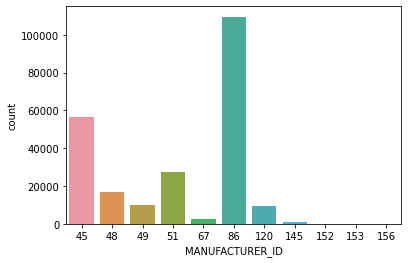

In [78]:
print(loan_df['MANUFACTURER_ID'].value_counts())
print(loan_df['MANUFACTURER_ID'].value_counts(normalize=True))
sns.countplot(x="MANUFACTURER_ID", data=loan_df)
plt.show()

In [79]:
loan_df.groupby('MANUFACTURER_ID').max()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
MANUFACTURER_ID,,,,,,,,,,,,,,,,,,,,,
45,105768,123865,95.00,Self employed,22,1,1,1,1,1,...,15019914,1814000,35,11,23,1,64,12,197,423
48,167447,219140,85.00,Self employed,20,1,1,1,1,1,...,25642806,4170901,20,7,13,1,63,12,192,306
49,332045,459625,89.95,Self employed,20,1,1,1,1,1,...,3750505,289051,12,7,19,1,63,12,195,355
51,191392,286350,90.00,Self employed,22,1,1,1,1,1,...,11305579,1589946,21,7,19,1,69,12,185,468
67,190887,260715,89.99,Self employed,21,1,1,1,1,1,...,2658172,239822,13,5,8,1,63,12,214,239
86,166972,237534,95.00,Self employed,22,1,1,1,1,1,...,20766553,3246710,28,20,36,1,64,12,369,449
120,117227,150113,90.00,Self employed,21,1,1,1,1,1,...,6274520,430379,17,12,11,1,63,12,182,306
145,96899,131000,84.94,Self employed,17,1,1,1,1,1,...,684178,20211,11,11,11,1,61,12,161,307
152,990572,1628992,84.79,Self employed,9,1,1,0,0,0,...,45117,0,3,0,2,0,44,10,70,122


In [80]:
loan_df.groupby('MANUFACTURER_ID').max()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
MANUFACTURER_ID,,,,,,,,,,,,,,,,,,,,,
45,105768,123865,95.00,Self employed,22,1,1,1,1,1,...,15019914,1814000,35,11,23,1,64,12,197,423
48,167447,219140,85.00,Self employed,20,1,1,1,1,1,...,25642806,4170901,20,7,13,1,63,12,192,306
49,332045,459625,89.95,Self employed,20,1,1,1,1,1,...,3750505,289051,12,7,19,1,63,12,195,355
51,191392,286350,90.00,Self employed,22,1,1,1,1,1,...,11305579,1589946,21,7,19,1,69,12,185,468
67,190887,260715,89.99,Self employed,21,1,1,1,1,1,...,2658172,239822,13,5,8,1,63,12,214,239
86,166972,237534,95.00,Self employed,22,1,1,1,1,1,...,20766553,3246710,28,20,36,1,64,12,369,449
120,117227,150113,90.00,Self employed,21,1,1,1,1,1,...,6274520,430379,17,12,11,1,63,12,182,306
145,96899,131000,84.94,Self employed,17,1,1,1,1,1,...,684178,20211,11,11,11,1,61,12,161,307
152,990572,1628992,84.79,Self employed,9,1,1,0,0,0,...,45117,0,3,0,2,0,44,10,70,122


Exploring categorical variables and their relationship to the target variable

In [86]:
def explore_categorical(col_name):   
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(loan_df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

MANUFACTURER_ID Summary


MANUFACTURER_ID Counts
86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64


MANUFACTURER_ID Ratio
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


MANUFACTURER_ID Default Counts
LOAN_DEFAULT           0        1
MANUFACTURER_ID                  
45               43687.0  12939.0
48               12156.0   4554.0
49                7984.0   2236.0
51               21547.0   5657.0
67                1882.0    523.0
86               87124.0  22410.0
120               7526.0   2132.0
145                622.0    156.0
152                  6.0      NaN
153                  8.0      4.0
156                  1.0      NaN


MANUFACTURER_ID Default Ratio
LOAN_DEFAULT    

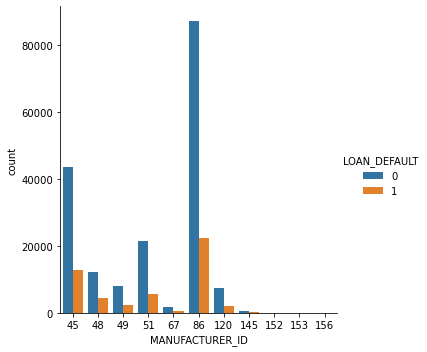

In [87]:
explore_categorical("MANUFACTURER_ID")

DISBURSAL_MONTH Summary


DISBURSAL_MONTH Counts
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


DISBURSAL_MONTH Ratio
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
1                 1316    392
2                   23      2
3                 4094   1054
4                 3636    991
5                 2279    611
6                 4697   1294
7                 3222    928
8                44938  12037
9                43910  10533
10               64474  20401
11                5484   1225
12                4470   1143


DISBURSAL_MONTH Default Ratio
LOAN_DEFAULT            0         1
DISBURSA

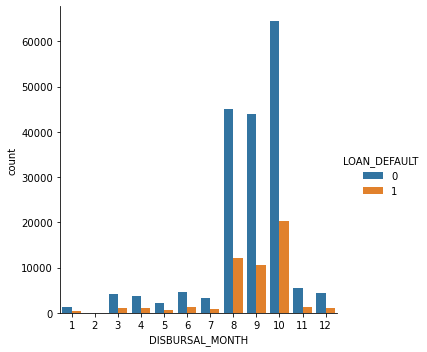

In [88]:
explore_categorical("DISBURSAL_MONTH")

Exploring the continous variables

In [89]:
loan_df["AGE"].describe()

count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64

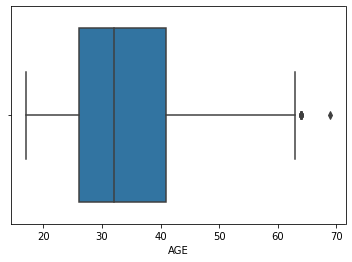

In [90]:
sns.boxplot(x="AGE", data=loan_df)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


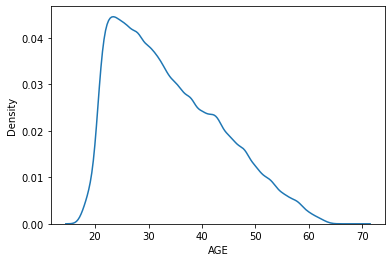

In [93]:
sns.distplot(loan_df['AGE'], hist=False)
plt.show()

Exploring continous variables in relation to the target variable

In [94]:
def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient="h")
    plt.show()

AGE Summary


count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64




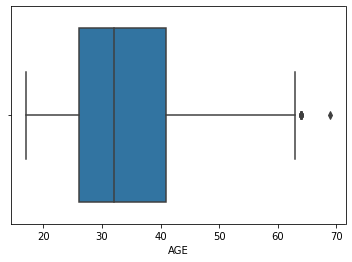

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


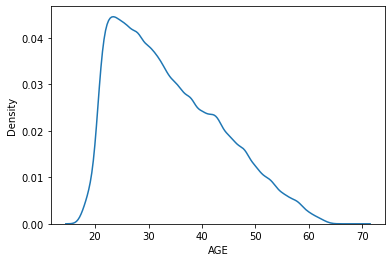

AGE Grouped Summary


                 count       mean       std   min   25%   50%   75%   max
LOAN_DEFAULT                                                             
0             182543.0  34.090713  9.860825  17.0  26.0  32.0  41.0  69.0
1              50611.0  33.225366  9.685441  17.0  25.0  31.0  40.0  64.0


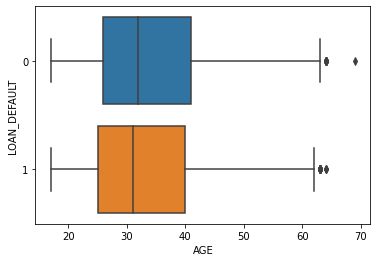

In [95]:
explore_continuous('AGE')

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




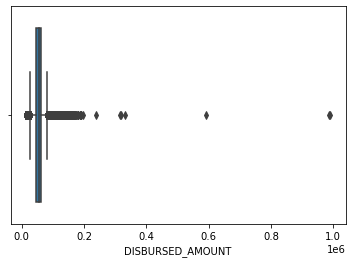

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


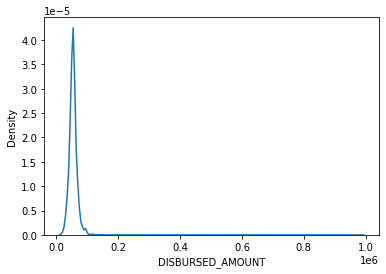

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


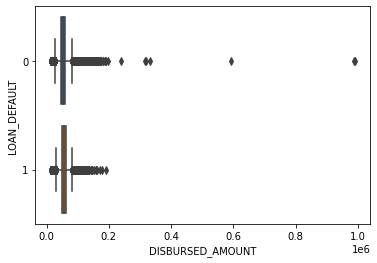

In [96]:
explore_continuous('DISBURSED_AMOUNT')

In [98]:
loan_df['DISBURSED_AMOUNT'].idxmax()

440173

In [99]:
loan_df.loc[loan_df['DISBURSED_AMOUNT'].idxmax()]

DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                            1
PAN_FLAG                                                                               1
VOTERID_FLAG                                                                           0
DRIVING_FLAG                                                                           0
PASSPORT_FLAG                                                                          0
PERFORM_CNS_SCORE    

AADHAR_FLAG Summary


AADHAR_FLAG Counts
1    195924
0     37230
Name: AADHAR_FLAG, dtype: int64


AADHAR_FLAG Ratio
1    0.84032
0    0.15968
Name: AADHAR_FLAG, dtype: float64


AADHAR_FLAG Default Counts
LOAN_DEFAULT       0      1
AADHAR_FLAG                
0              27684   9546
1             154859  41065


AADHAR_FLAG Default Ratio
LOAN_DEFAULT         0         1
AADHAR_FLAG                     
0             0.743594  0.256406
1             0.790403  0.209597




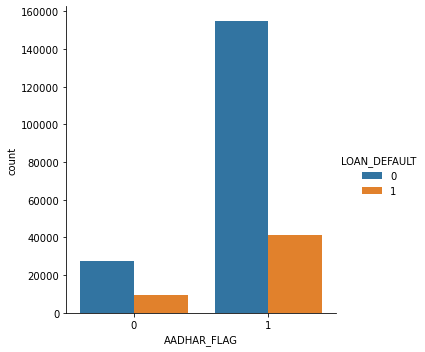

In [97]:
explore_categorical('AADHAR_FLAG')

In [100]:
disbursed_buckets = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_labels = ['13k - 30k', '30k - 45k', '45k - 60k', '60k - 75k', '75k - 150k', '150k - 1m']

In [101]:
loan_df['DISBURSED_CAT'] = pd.cut(loan_df['DISBURSED_AMOUNT'], disbursed_buckets, labels=disbursed_labels)

DISBURSED_CAT Summary


DISBURSED_CAT Counts
45k - 60k     126904
60k - 75k      49824
30k - 45k      40626
75k - 150k     10871
13k - 30k       4865
150k - 1m         64
Name: DISBURSED_CAT, dtype: int64


DISBURSED_CAT Ratio
45k - 60k     0.544293
60k - 75k     0.213696
30k - 45k     0.174245
75k - 150k    0.046626
13k - 30k     0.020866
150k - 1m     0.000274
Name: DISBURSED_CAT, dtype: float64


DISBURSED_CAT Default Counts
LOAN_DEFAULT       0      1
DISBURSED_CAT              
13k - 30k       4207    658
30k - 45k      34323   6303
45k - 60k      98830  28074
60k - 75k      37056  12768
75k - 150k      8070   2801
150k - 1m         57      7


DISBURSED_CAT Default Ratio
LOAN_DEFAULT          0         1
DISBURSED_CAT                    
13k - 30k      0.864748  0.135252
30k - 45k      0.844853  0.155147
45k - 60k      0.778778  0.221222
60k - 75k      0.743738  0.256262
75k - 150k     0.742342  0.257658
150k - 1m      0.890625  0.109375




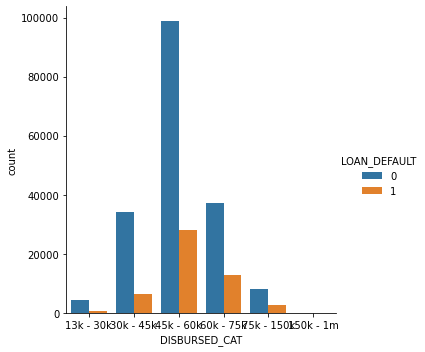

In [102]:
explore_categorical('DISBURSED_CAT')

In [103]:
loan_df['DISBURSAL_DIFFERENCE'] = loan_df['ASSET_COST'] - loan_df['DISBURSED_AMOUNT']

In [104]:
loan_df[['DISBURSAL_DIFFERENCE', 'ASSET_COST', 'DISBURSED_AMOUNT']].sample(5)

,DISBURSAL_DIFFERENCE,ASSET_COST,DISBURSED_AMOUNT
UNIQUEID,,,
653168,16557,66560,50003
497851,18526,44255,25729
458983,13357,63700,50343
635614,19183,89000,69817
489078,13531,71190,57659


In [105]:
loan_df['TOTAL_ACCTS'] = loan_df['PRI_NO_OF_ACCTS'] + loan_df['SEC_NO_OF_ACCTS']

In [106]:
loan_df[['TOTAL_ACCTS', 'PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS']].sample(10)


,TOTAL_ACCTS,PRI_NO_OF_ACCTS,SEC_NO_OF_ACCTS
UNIQUEID,,,
650844,0,0,0
454370,0,0,0
490464,0,0,0
435163,0,0,0
449466,0,0,0
589529,0,0,0
635605,4,4,0
619668,8,8,0
532596,0,0,0


Combining primary and secondary accounts 

In [107]:
loan_df['TOTAL_ACTIVE_ACCTS'] = loan_df['PRI_ACTIVE_ACCTS'] + loan_df['SEC_ACTIVE_ACCTS']
loan_df['TOTAL_OVERDUE_ACCTS'] = loan_df['PRI_OVERDUE_ACCTS'] + loan_df['SEC_OVERDUE_ACCTS']
loan_df['TOTAL_CURRENT_BALANCE'] = loan_df['PRI_CURRENT_BALANCE'] + loan_df['SEC_CURRENT_BALANCE']
loan_df['TOTAL_SANCTIONED_AMOUNT'] = loan_df['PRI_SANCTIONED_AMOUNT'] + loan_df['SEC_SANCTIONED_AMOUNT'] 
loan_df['TOTAL_DISBURSED_AMOUNT'] = loan_df['PRI_DISBURSED_AMOUNT'] + loan_df['SEC_DISBURSED_AMOUNT']
loan_df['TOTAL_INSTAL_AMT'] = loan_df['PRIMARY_INSTAL_AMT'] + loan_df['SEC_INSTAL_AMT']

In [109]:
drop_cols = ['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']

loan_df = loan_df.drop(drop_cols, axis=1)

In [110]:
loan_df['OVERDUE_PCT'] = loan_df['TOTAL_OVERDUE_ACCTS'] / loan_df['TOTAL_ACCTS']

In [111]:
loan_df['OVERDUE_PCT'].isnull().sum()

115792

In [112]:
loan_df['OVERDUE_PCT'] = loan_df['OVERDUE_PCT'].fillna(0)

In [113]:
loan_df['OVERDUE_PCT'].isnull().sum()

0

In [114]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   DISBURSED_AMOUNT                     233154 non-null  int64   
 1   ASSET_COST                           233154 non-null  int64   
 2   LTV                                  233154 non-null  float64 
 3   MANUFACTURER_ID                      233154 non-null  int64   
 4   EMPLOYMENT_TYPE                      233154 non-null  object  
 5   STATE_ID                             233154 non-null  int64   
 6   AADHAR_FLAG                          233154 non-null  int64   
 7   PAN_FLAG                             233154 non-null  int64   
 8   VOTERID_FLAG                         233154 non-null  int64   
 9   DRIVING_FLAG                         233154 non-null  int64   
 10  PASSPORT_FLAG                        233154 non-null  int64   


Scaling to remove outliers and bringing our continous variables in a range

In [116]:
numeric_cols = ['DISBURSED_AMOUNT', 
                'ASSET_COST', 
                'LTV', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                'NO_OF_INQUIRIES', 
                'AGE', 
                'AVERAGE_ACCT_AGE_MONTHS', 
                'CREDIT_HISTORY_LENGTH_MONTHS',
                'PERFORM_CNS_SCORE',
                'TOTAL_ACCTS',
                'TOTAL_ACTIVE_ACCTS',
                'TOTAL_OVERDUE_ACCTS',
                'TOTAL_CURRENT_BALANCE', 
                'TOTAL_SANCTIONED_AMOUNT', 
                'TOTAL_DISBURSED_AMOUNT', 
                'TOTAL_INSTAL_AMT', 
                'OVERDUE_PCT', 
                'DISBURSAL_DIFFERENCE']

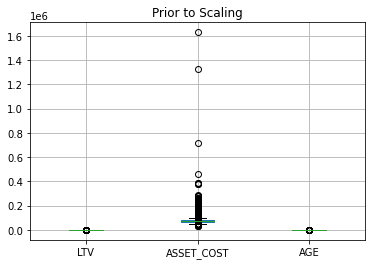

In [117]:
loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('Prior to Scaling')
plt.show()

Converting category data into category column

In [127]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols].dtypes

MANUFACTURER_ID                     int64
STATE_ID                            int64
DISBURSAL_MONTH                     int64
DISBURSED_CAT                    category
PERFORM_CNS_SCORE_DESCRIPTION      object
EMPLOYMENT_TYPE                    object
dtype: object

In [128]:
loan_df[category_cols] = loan_df[category_cols].astype('category')
loan_df[category_cols].dtypes

MANUFACTURER_ID                  category
STATE_ID                         category
DISBURSAL_MONTH                  category
DISBURSED_CAT                    category
PERFORM_CNS_SCORE_DESCRIPTION    category
EMPLOYMENT_TYPE                  category
dtype: object

In [129]:
small_cols = ['STATE_ID', 'LTV', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT']

loan_df_sml = loan_df[small_cols]

In [130]:
loan_df_sml.shape

(233154, 6)

In [131]:
loan_df_sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   STATE_ID           233154 non-null  category
 1   LTV                233154 non-null  float64 
 2   DISBURSED_CAT      233154 non-null  category
 3   PERFORM_CNS_SCORE  233154 non-null  int64   
 4   DISBURSAL_MONTH    233154 non-null  category
 5   LOAN_DEFAULT       233154 non-null  int64   
dtypes: category(3), float64(1), int64(2)
memory usage: 15.8 MB


Splitting our data to train and test

In [132]:
x = loan_df_sml.drop(['LOAN_DEFAULT'], axis=1)
y = loan_df_sml['LOAN_DEFAULT']

In [133]:
print("x has {0} rows and {1} columns".format(x.shape[0], x.shape[1]))
print("y has {0} rows".format(y.count()))

x has 233154 rows and 5 columns
y has 233154 rows


In [134]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   STATE_ID           233154 non-null  category
 1   LTV                233154 non-null  float64 
 2   DISBURSED_CAT      233154 non-null  category
 3   PERFORM_CNS_SCORE  233154 non-null  int64   
 4   DISBURSAL_MONTH    233154 non-null  category
dtypes: category(3), float64(1), int64(1)
memory usage: 14.1 MB


In [135]:
y.dtype

dtype('int64')

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Splitting our data to test and train

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
print("x_train has {0} rows and {1} columns".format(x_train.shape[0], x_train.shape[1]))
print("x_test has {0} rows and {1} columns".format(x_test.shape[0], x_test.shape[1]))
print("y_train has {0} rows".format(y_train.count()))
print("y_test has {0} rows".format(y_test.count()))

x_train has 186523 rows and 5 columns
x_test has 46631 rows and 5 columns
y_train has 186523 rows
y_test has 46631 rows


In [140]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186523 entries, 633275 to 501520
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   STATE_ID           186523 non-null  category
 1   LTV                186523 non-null  float64 
 2   DISBURSED_CAT      186523 non-null  category
 3   PERFORM_CNS_SCORE  186523 non-null  int64   
 4   DISBURSAL_MONTH    186523 non-null  category
dtypes: category(3), float64(1), int64(1)
memory usage: 4.8 MB


In [141]:
y_train.head()

UNIQUEID
633275    1
646002    0
591252    0
475736    0
639478    0
Name: LOAN_DEFAULT, dtype: int64

In [142]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46631 entries, 617183 to 626383
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   STATE_ID           46631 non-null  category
 1   LTV                46631 non-null  float64 
 2   DISBURSED_CAT      46631 non-null  category
 3   PERFORM_CNS_SCORE  46631 non-null  int64   
 4   DISBURSAL_MONTH    46631 non-null  category
dtypes: category(3), float64(1), int64(1)
memory usage: 1.2 MB


In [143]:
y_test.head()

UNIQUEID
617183    1
515702    0
466872    0
632384    0
461426    0
Name: LOAN_DEFAULT, dtype: int64

In [144]:
y_train.value_counts(normalize=True)

0    0.783099
1    0.216901
Name: LOAN_DEFAULT, dtype: float64

In [145]:
y_test.value_counts(normalize=True)

0    0.782248
1    0.217752
Name: LOAN_DEFAULT, dtype: float64

In [146]:
logistic_model = LogisticRegression()

In [148]:
loan_data_dumm = pd.get_dummies(loan_df_sml, prefix_sep='_', drop_first=True)

In [149]:
loan_data_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LTV                       233154 non-null  float64
 1   PERFORM_CNS_SCORE         233154 non-null  int64  
 2   LOAN_DEFAULT              233154 non-null  int64  
 3   STATE_ID_2                233154 non-null  uint8  
 4   STATE_ID_3                233154 non-null  uint8  
 5   STATE_ID_4                233154 non-null  uint8  
 6   STATE_ID_5                233154 non-null  uint8  
 7   STATE_ID_6                233154 non-null  uint8  
 8   STATE_ID_7                233154 non-null  uint8  
 9   STATE_ID_8                233154 non-null  uint8  
 10  STATE_ID_9                233154 non-null  uint8  
 11  STATE_ID_10               233154 non-null  uint8  
 12  STATE_ID_11               233154 non-null  uint8  
 13  STATE_ID_12               233154 non-nu

In [150]:
print(loan_data_dumm['STATE_ID_13'].value_counts())
print(loan_data_dumm['STATE_ID_13'].value_counts(normalize=True))

print(loan_data_dumm['DISBURSAL_MONTH_10'].value_counts())
print(loan_data_dumm['DISBURSAL_MONTH_10'].value_counts(normalize=True))

0    215270
1     17884
Name: STATE_ID_13, dtype: int64
0    0.923295
1    0.076705
Name: STATE_ID_13, dtype: float64
0    148279
1     84875
Name: DISBURSAL_MONTH_10, dtype: int64
0    0.63597
1    0.36403
Name: DISBURSAL_MONTH_10, dtype: float64


In [151]:
x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
y = loan_data_dumm['LOAN_DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.782975
1    0.217025
Name: LOAN_DEFAULT, dtype: float64
0    0.782821
1    0.217179
Name: LOAN_DEFAULT, dtype: float64


In [154]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [155]:
preds = logistic_model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Getting the accuracy of the model

In [156]:
logistic_model.score(x_test, y_test)

0.7828355755071698

Evaluating the model

In [157]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [181]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


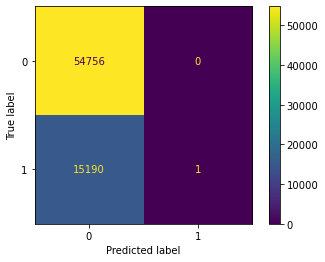



Accuracy:  0.7828355755071698
Precision:  1.0
Recall:  6.582845105654664e-05
F1:  0.00013164823591363875
AUC:  0.6082151034828396


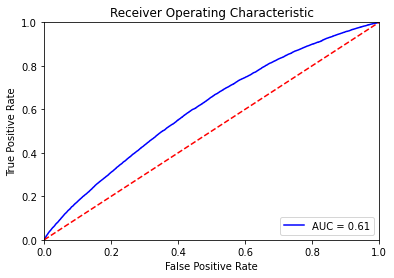

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


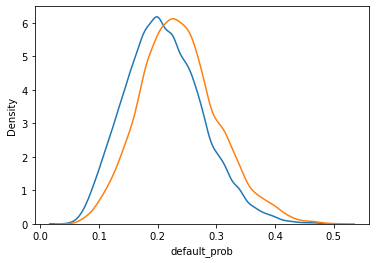

true_class  predicted_class
0           0                  1.000000
1           0                  0.999934
            1                  0.000066
Name: predicted_class, dtype: float64


In [182]:
eval_model(logistic_model, x_test, y_test)

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [184]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

In [187]:
def encode_and_split(loan_df):
    loan_data_dumm = pd.get_dummies(loan_df, prefix_sep='_', drop_first=True)

    x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
    y = loan_data_dumm['LOAN_DEFAULT']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test

In [188]:
x_train, x_test, y_train, y_test = encode_and_split(loan_df)

In [189]:
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (186523, 92)
Training Label Rows 186523


In [190]:
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (46631, 92)
Testing Label Rows 46631


In [191]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.783099
1    0.216901
Name: LOAN_DEFAULT, dtype: float64
0    0.782248
1    0.217752
Name: LOAN_DEFAULT, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


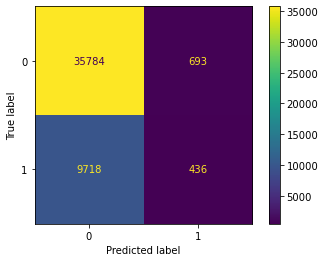



Accuracy:  0.7767365057579722
Precision:  0.3861824623560673
Recall:  0.04293874335237345
F1:  0.07728441017459896
AUC:  0.6235753209548471


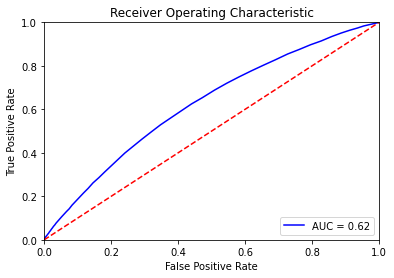

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


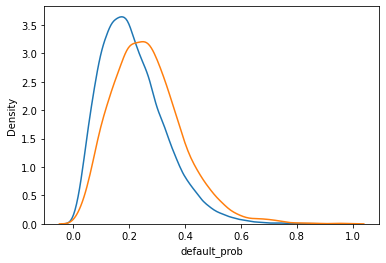

true_class  predicted_class
0           0                  0.981002
            1                  0.018998
1           0                  0.957061
            1                  0.042939
Name: predicted_class, dtype: float64


In [192]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

Accuracy
~78% similar to the simple logistic regression model we built already
Precision
39% better than simple logistic Regression which had ~33%
More of the instances we classified as defaults actually were defaults
However, most of the instances we classify as defaults are actually not defaults
Recall
Recall has increased dramatically, from 0.03% to 4.5%!
Random Forest picked up a lot more of the actual positive cases
It still missed most of them
F1
The F1 score has also increased dramatically from 0.0006 to ~0.08!
There is a better balance between Precision and Recall for Random Forest
Although this is still generally poor
AUC
The area under the roc curve has increased very slightly
Probability Distributions
Plot shows bad class separation
Majority of cases unlikely to be classified as defaults
Generally the random forest is better than Logistic Regression but it is still not doing a good job

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


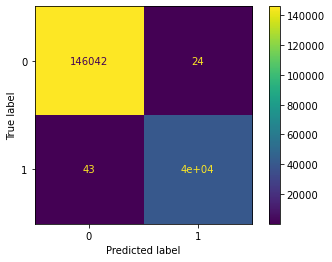



Accuracy:  0.9996407949689851
Precision:  0.9994064988377269
Recall:  0.9989371431396298
F1:  0.9991717658693368
AUC:  0.9999960149031653


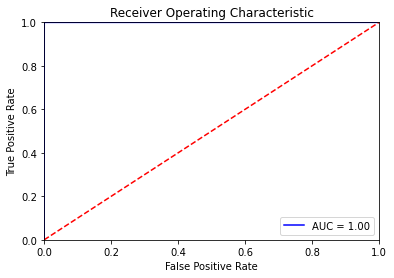

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


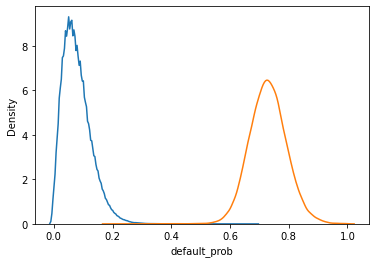

true_class  predicted_class
0           0                  0.999836
            1                  0.000164
1           1                  0.998937
            0                  0.001063
Name: predicted_class, dtype: float64


In [194]:
eval_model(rfc_model, x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


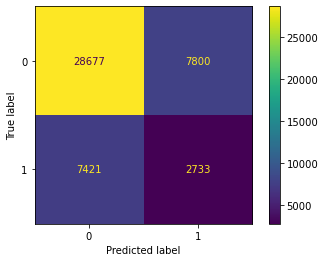



Accuracy:  0.6735862409126976
Precision:  0.2594702363998861
Recall:  0.2691550128028363
F1:  0.2642239087349543
AUC:  0.5279463984981911


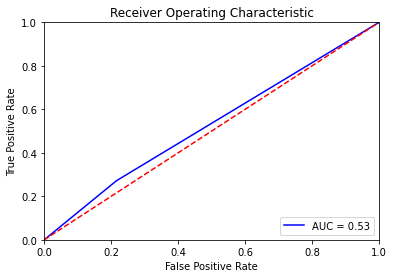

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


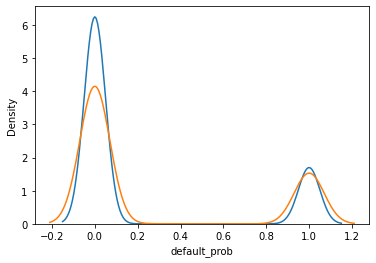

true_class  predicted_class
0           0                  0.786167
            1                  0.213833
1           0                  0.730845
            1                  0.269155
Name: predicted_class, dtype: float64


In [195]:
rfc_model = RandomForestClassifier(n_estimators=1)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

Increasing our forest size to 10

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


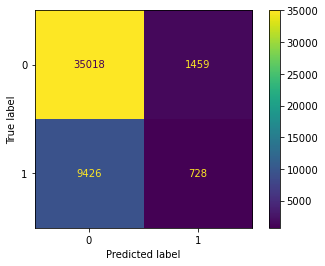



Accuracy:  0.7665715940039888
Precision:  0.33287608596250573
Recall:  0.07169588339570612
F1:  0.11798071469086785
AUC:  0.5836197469191843


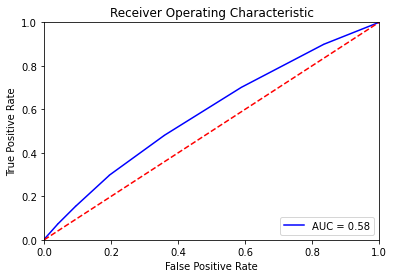

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


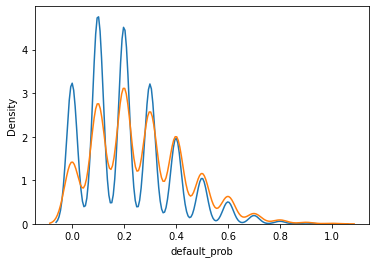

true_class  predicted_class
0           0                  0.960002
            1                  0.039998
1           0                  0.928304
            1                  0.071696
Name: predicted_class, dtype: float64


In [196]:
rfc_model = RandomForestClassifier(n_estimators=10)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


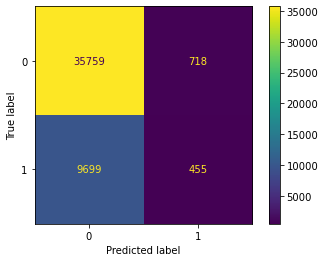



Accuracy:  0.7766078359889343
Precision:  0.3878942881500426
Recall:  0.04480992712231633
F1:  0.08033901297784056
AUC:  0.6220684273277958


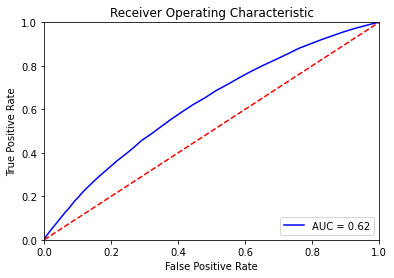

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


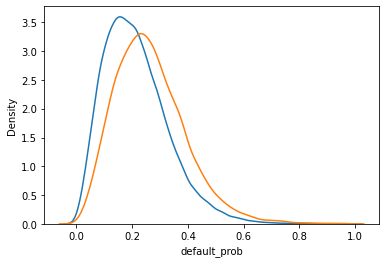

true_class  predicted_class
0           0                  0.980316
            1                  0.019684
1           0                  0.955190
            1                  0.044810
Name: predicted_class, dtype: float64


In [198]:
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


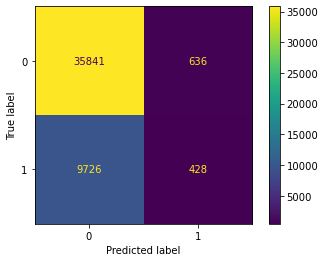



Accuracy:  0.7777873088717806
Precision:  0.40225563909774437
Recall:  0.04215087650187118
F1:  0.07630593688714565
AUC:  0.6280492170444929


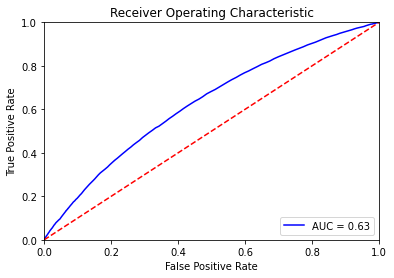

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


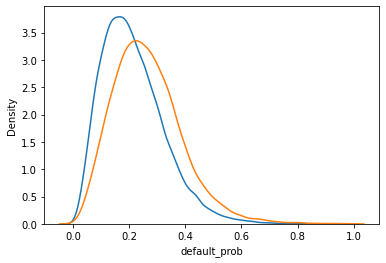

true_class  predicted_class
0           0                  0.982564
            1                  0.017436
1           0                  0.957849
            1                  0.042151
Name: predicted_class, dtype: float64


In [199]:
rfc_model = RandomForestClassifier(n_estimators=300)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

Increasing our Max_depth

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


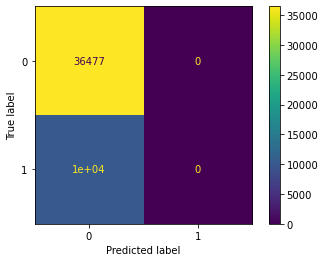



Accuracy:  0.7822478608650898
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.6305512280602116


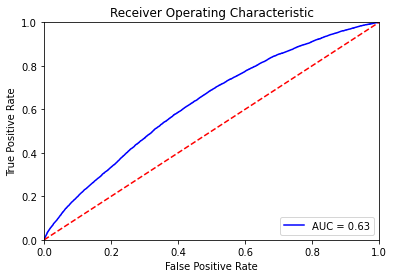

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


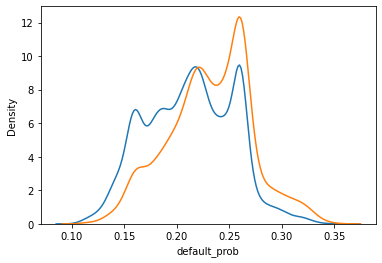

true_class  predicted_class
0           0                  1.0
1           0                  1.0
Name: predicted_class, dtype: float64


In [200]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


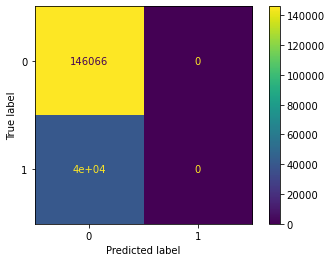



Accuracy:  0.783099135227291
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.6405036557463794


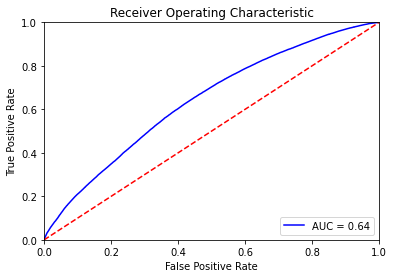

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


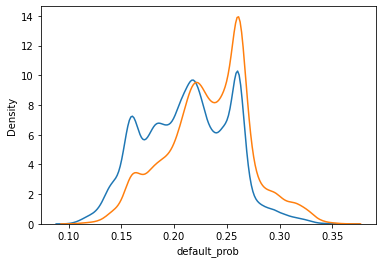

true_class  predicted_class
0           0                  1.0
1           0                  1.0
Name: predicted_class, dtype: float64


In [201]:
eval_model(rfc_model, x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


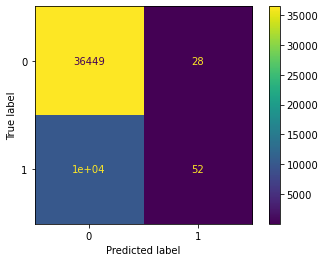



Accuracy:  0.7827625399412408
Precision:  0.65
Recall:  0.005121134528264723
F1:  0.01016220441665038
AUC:  0.6486529911064105


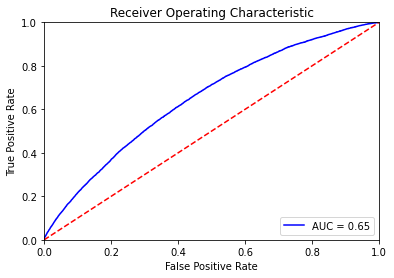

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


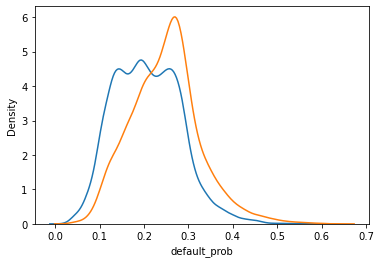

true_class  predicted_class
0           0                  0.999232
            1                  0.000768
1           0                  0.994879
            1                  0.005121
Name: predicted_class, dtype: float64


In [202]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=15)
rfc_model.fit(x_train, y_train)

eval_model(rfc_model, x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


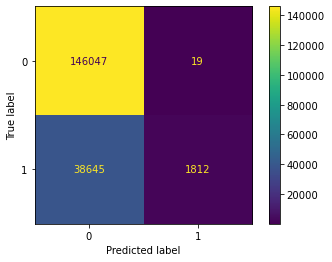



Accuracy:  0.7927118907587805
Precision:  0.9896231567449482
Recall:  0.04478829374397508
F1:  0.08569807037457434
AUC:  0.8253005197998907


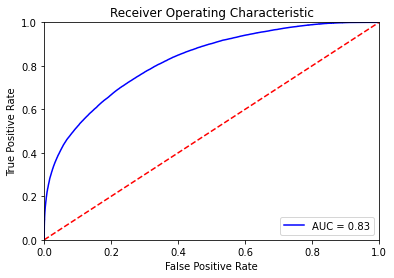

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


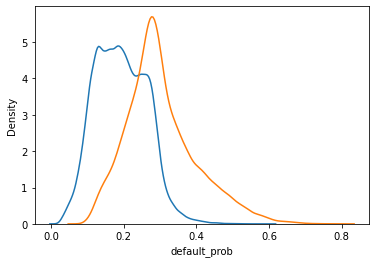

true_class  predicted_class
0           0                  0.999870
            1                  0.000130
1           0                  0.955212
            1                  0.044788
Name: predicted_class, dtype: float64


In [203]:
eval_model(rfc_model, x_train, y_train)

In [208]:
!pip install imblearn 

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py)

In [212]:
from sklearn.ensemble import RandomForestClassifier


In [213]:
from sklearn.model_selection import train_test_split

In [214]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [215]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py)

In [216]:
from sklearn.utils import resample

In [217]:
x_train, x_test, y_train, y_test = encode_and_split(loan_df)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


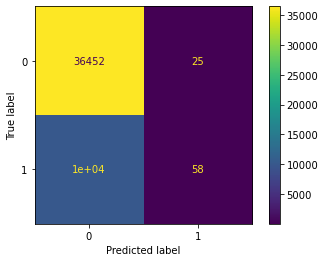



Accuracy:  0.7829555445947974
Precision:  0.6987951807228916
Recall:  0.005712034666141422
F1:  0.011331444759206798
AUC:  0.6482689770235147


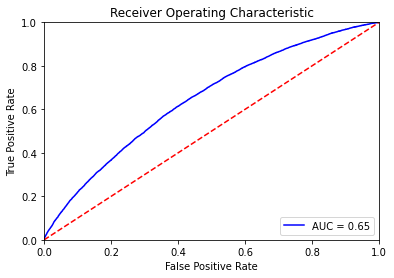

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


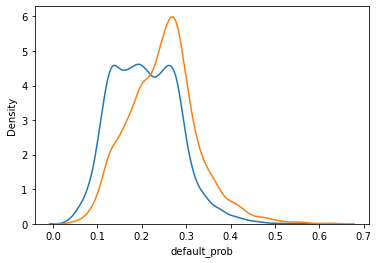

true_class  predicted_class
0           0                  0.999315
            1                  0.000685
1           0                  0.994288
            1                  0.005712
Name: predicted_class, dtype: float64


In [218]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15)

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


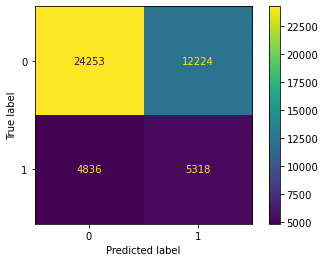



Accuracy:  0.6341489567026227
Precision:  0.3031581347622848
Recall:  0.5237344888713807
F1:  0.38402657423454656
AUC:  0.6400380409209212


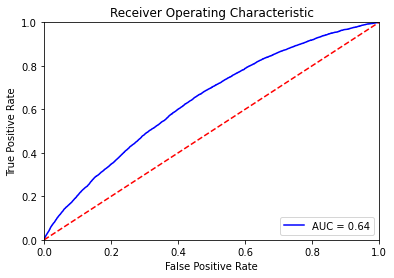

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


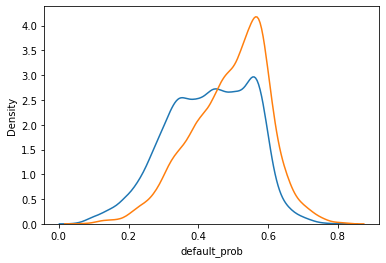

true_class  predicted_class
0           0                  0.664885
            1                  0.335115
1           1                  0.523734
            0                  0.476266
Name: predicted_class, dtype: float64


In [219]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15, class_weight='balanced')

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

Resampling

In [220]:
train_df = x_train.copy()
train_df['LOAN_DEFAULT'] = y_train

In [221]:
print(train_df['LOAN_DEFAULT'].value_counts())
print(train_df['LOAN_DEFAULT'].value_counts(normalize=True))

0    146066
1     40457
Name: LOAN_DEFAULT, dtype: int64
0    0.783099
1    0.216901
Name: LOAN_DEFAULT, dtype: float64


In [222]:
train_minority = train_df[train_df['LOAN_DEFAULT'] == 1]
train_majority = train_df[train_df['LOAN_DEFAULT'] == 0]

In [223]:
train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)

In [224]:
print(train_majority['LOAN_DEFAULT'].value_counts())
print(train_minority_up['LOAN_DEFAULT'].value_counts())

0    146066
Name: LOAN_DEFAULT, dtype: int64
1    146066
Name: LOAN_DEFAULT, dtype: int64


In [225]:
train_up_df = pd.concat([train_majority, train_minority_up])

In [226]:
print(train_up_df['LOAN_DEFAULT'].value_counts())
print(train_up_df['LOAN_DEFAULT'].value_counts(normalize=True))

0    146066
1    146066
Name: LOAN_DEFAULT, dtype: int64
0    0.5
1    0.5
Name: LOAN_DEFAULT, dtype: float64


In [227]:
x_train_up = train_up_df.drop(['LOAN_DEFAULT'], axis=1)
y_train_up = train_up_df['LOAN_DEFAULT']

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


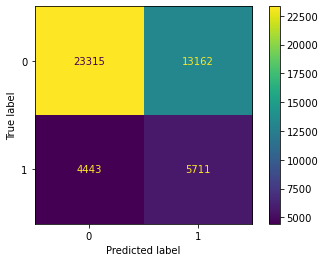



Accuracy:  0.6224614526816924
Precision:  0.3026016001695544
Recall:  0.5624384479023045
F1:  0.39349571088986113
AUC:  0.6444158578933307


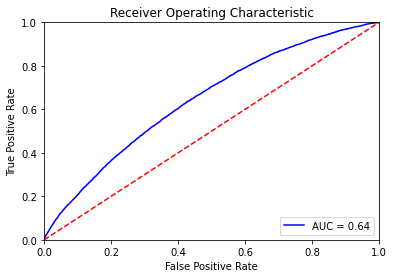

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


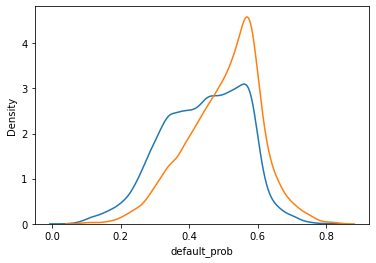

true_class  predicted_class
0           0                  0.639170
            1                  0.360830
1           1                  0.562438
            0                  0.437562
Name: predicted_class, dtype: float64


In [228]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth=15)

rfc_model.fit(x_train_up, y_train_up)
eval_model(rfc_model, x_test, y_test)

Downsampling

In [229]:
def balance_sample(x_train, y_train, sample_mode='up'):
    train_df = x_train.copy()
    train_df['LOAN_DEFAULT'] = y_train

    train_minority = train_df[train_df['LOAN_DEFAULT'] == 1]
    train_majority = train_df[train_df['LOAN_DEFAULT'] == 0]

    train_sampled_df = pd.DataFrame()

    if sample_mode == 'down':
        train_majority_down = resample(train_majority, replace=False,  n_samples=train_minority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_minority, train_majority_down])  
    else:
        train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_majority, train_minority_up])

    x_train_samp = train_sampled_df.drop(['LOAN_DEFAULT'], axis=1)
    y_train_samp = train_sampled_df['LOAN_DEFAULT']

    return x_train_samp, y_train_samp 

In [230]:
#downsample random forest
x_train_dwn, y_train_dwn = balance_sample(x_train, y_train, sample_mode='down')

print(y_train_dwn.value_counts())
print(y_train_dwn.value_counts(normalize=True))

1    40457
0    40457
Name: LOAN_DEFAULT, dtype: int64
1    0.5
0    0.5
Name: LOAN_DEFAULT, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


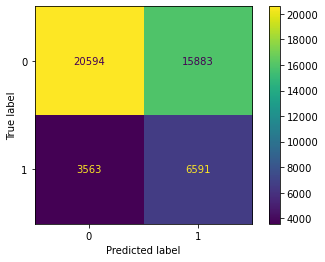



Accuracy:  0.582981278548605
Precision:  0.2932722256830115
Recall:  0.6491038014575536
F1:  0.4040088267745494
AUC:  0.6472310477100442


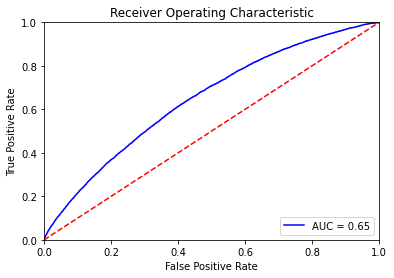

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


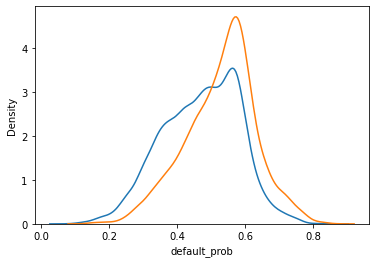

true_class  predicted_class
0           0                  0.564575
            1                  0.435425
1           1                  0.649104
            0                  0.350896
Name: predicted_class, dtype: float64


In [231]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15)

rfc_model.fit(x_train_dwn, y_train_dwn)
eval_model(rfc_model, x_test, y_test)

In [232]:
smote = SMOTE()

NameError: name 'SMOTE' is not defined

In [ ]:
x_train_synth, y_train_synth = smote.fit_resample(x_train, y_train)

In [ ]:
print(y_train_synth.value_counts())
print(y_train_synth.value_counts(normalize=True))